# Creating a Customized Visualization

This project consists in creating a Python code that allows visualizing a plot that helps in making judgements about probabilistic data generated through samples. The idea of the plot is contained in the article referred below. This project is a Python implementation of such an idea.

_Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). "Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions."_

[Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

Four normal distributions are used representing data related to samples collected in four different years. A bar plot for the mean of such distributions is plotted and 95% confidence intervals are overlapped to this plot.

A challenge that users face with such a plot is that, for a given y-axis value, it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal).

One of solutions described in the above-mentioned paper is to allow users to indicate the y-axis value of interest and then draw a horizontal line and color bars based on this value.

In this implementation an initial value of 40200 is hard coded to show the way the plot works. Users can dynamically change this value with a mouse click on the plot.

Bars get a warm color (red) if they are definitely above the selected y-axis value (given the confidence interval), a cold color (blue) if they are definitely below the selected y-axis value, a light gray color if they correspond to the selected y-axis value (that is, the mean value corresponds to the selected y-value).

Whenever the y-axis value falls in the confidence interval of the bar and does not correspond with the centre of this interval (the mean value), the bar gets a washed down color which is more gray the more the value gets closer to the mean value. It is a warm color if the selected y-axis value is lower than the mean value, it is a cold color if the selected y-axis value is larger than the mean value.

The code makes use of pandas and matplot libraries and has been realized with Jupyter Notebook.

<IPython.core.display.Javascript object>


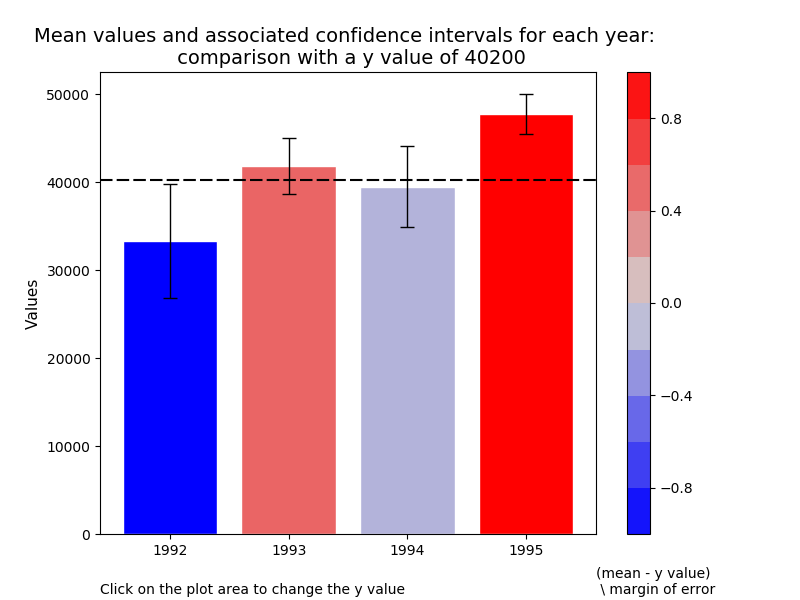

7

In [11]:
### Loading the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as col
import matplotlib.cm as cm
%matplotlib notebook

### Defining the input data
## Setting a seed
np.random.seed(12345)
## Defining a dataframe with 4 normal distributions corresponding to 4 years (with the same sample size)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

### Manipulating the data
## Transposing the dataframe so columns corresponds to years
dft = df.T
## Calculating the needed statistical parameters
# Number of samples for each distribution
n = 3650
# Mean values
means = dft.mean()
# Standard deviation values
stds = dft.std()
# Values of the margin of error for a 95% confidence interval (normal distribution)
mes = stds/(n**0.5)*1.96
# years: means.index

### Defining an initial y value
y_value = 40200

### Defining the bar plot for the mean values with confidence intervals
plt.figure(figsize=(8,6))
## Defining a color map for the bars (blu/gray/red, normalized in a (-1, +1) interval)
colmap = col.LinearSegmentedColormap.from_list("blu/gray/red diverging colormap", ["blue","lightgray","red"])
colpick = cm.ScalarMappable(cmap = colmap, norm = col.Normalize(vmin = -1.0, vmax= 1.0))
## Adding an external legend color bar
colpick.set_array([])
plt.colorbar(colpick, boundaries=np.arange(-1,1.2,0.2), orientation='vertical')
## Defining bars' edges and initial bars' colours
edgecolours = ['w', 'w', 'w','w']
colours = ["lightgray", "lightgray", "lightgray", "lightgray"]
## Defining a function to draw the plot with certain bar colors
def drawplot (edgecolours, colours, y_value): 
    y_val = y_value
    ## Defining the bar fill colors based on the value of y
    # For each bar (for i ranging from 0 to the number of columns of the transposed dataframe (4))
    for i in list(range(0, len(dft.columns), 1)):
        # If y is below the confidence interval, the bar color is red
        if y_value < means.values[i] - mes.values[i]:
            colours[i] = 'r'
        # If y is above the confidence interval, the bar color is blu
        elif y_value > means.values[i] + mes.values[i]:
            colours[i] = 'b'
        # If y is inside the confidence interval, the bar color is according to a blue / light gray / red diverging colormap
        # scheme controlled by a variable that measures the distance from a pure light gray case (y_value = mean), normalized
        # by using the margine of error of the bar
        else:
            colours[i] = colpick.to_rgba((means.values[i] - y_value) / mes.values[i])
    ## Creating the bar plot
    plt.bar(means.index, means, edgecolor = edgecolours, color = colours)
    ## Adding black vertical error bars with the confidence intervals (2*mes), centered on the top of the bars
    plt.errorbar(means.index, means, yerr = mes, fmt = 'none', ecolor = (0, 0, 0), lw=1, capsize=5, capthick=1)
    ## Adding a title
    plt.title ('Mean values and associated confidence intervals for each year: \n comparison with a y value of {}'.format(int(y_val)), fontsize = 14)
    ## Formatting the axis
    # Get the current axses
    axses = plt.gca()
    # Removing x axis ticks
    axses.xaxis.set_major_locator(mticker.NullLocator())
    # Adding the years into x asis
    plt.xticks(means.index, [1992, 1993, 1994, 1995])
    # Defining a label for the y axis
    axses.set_ylabel('Values', fontsize = 11)
    ## Adding an horizontal line corresponding the the y value
    plt.axhline(y = y_value, color = (0, 0, 0), linestyle = '-', dashes = [6, 2])
    ## Adding a text box under the figure
    textstr = 'Click on the plot area to change the y value'
    plt.gcf().text(0.125, 0.01, textstr, fontsize=10)
    ## Adding a text box under the color bar
    textcb = '(mean - y value)\n \ margin of error'
    plt.gcf().text(0.745, 0.01, textcb, fontsize=10)

### Drawing the initial plot
drawplot (edgecolours, colours, y_value)

### Defining a function to get the y value dynamically and drawing the plot accordingly        
def onclick(event):
    ## Get the y coordinate of the mouse position and store it in y_value
    y_value = event.ydata
    ## Clearing the plot, including the color bar
    plt.cla()
    ## Redrawing the bar plot with error bars and updated colors
    drawplot (edgecolours, colours, y_value)

### Connect the event (mouse click) to an event listener
## When the mouse button is pressed, the function onclick is called
plt.gcf().canvas.mpl_connect('button_press_event', onclick)